In [1]:
import pandas as pd
import ast
from itertools import product
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('filtered_2.csv')
data

id                                              movie    date  \
0      1000001                                             Barbie  2023.0   
1      1000003                  Everything Everywhere All at Once  2022.0   
2      1000004                                         Fight Club  1999.0   
3      1000005                                       Interstellar  2014.0   
4      1000006                                              Joker  2019.0   
...        ...                                                ...     ...   
36359  1126883                                           Bangaram  2006.0   
36360  1127955                           Emu War - OverSimplified  2018.0   
36361  1127969                     Lee Evans: Wired and Wonderful  2002.0   
36362  1128916                         The Return of 'Allo 'Allo!  2007.0   
36363  1144327  Gunnar Rehlin - A Small Film About Hurting Som...  1999.0   

       rating                                             actors  \
0        3.91  ['Margot Robbie', 'Lewis Easter', 'Onyemachi E...   
1        4.32  ['Randall Archer', 'Boon Pin Koh', 'Efka Kvara...   
2        4.27  ['Leonard Termo', 'Greg Bronson', 'Michael Art...   
3        4.32  ['Lena Georgas', 'Jeff Hephner', 'Elyes Gabel'...   
4        3.83  ['Danny Schoch', 'Graham Mabry', 'Steven Elson...   
...       ...                                                ...   
36359    2.97  ['Ashutosh Rana', 'Trisha Krishnan', 'L. B. Sr...   
36360    3.53                                 ['Stuart Webster']   
36361    3.56                                      ['Lee Evans']   
36362    3.62  ['Gorden Kaye', 'Vicki Michelle', 'Arthur Bost...   
36363    3.51  ['Tommy Bergqvist', 'Monte Reid', 'Martin Luuk...   

                                            genre language  \
0              ['Comedy', 'Fantasy', 'Adventure']  English   
1      ['Science Fiction', 'Action', 'Adventure']  English   
2                                       ['Drama']  English   
3       ['Science Fiction', 'Drama', 'Adventure']  English   
4                  ['Thriller', 'Drama', 'Crime']  English   
...                                           ...      ...   
36359                         ['Drama', 'Action']  English   
36360                  ['Documentary', 'History']  English   
36361                                  ['Comedy']  English   
36362                             ['Documentary']  English   
36363                      ['Comedy', 'TV Movie']  English   

                                  director  
0                         ['Greta Gerwig']  
1      ['Daniel Kwan', 'Daniel Scheinert']  
2                        ['David Fincher']  
3                    ['Christopher Nolan']  
4                        ['Todd Phillips']  
...                                    ...  
36359                          ['Dharani']  
36360                   ['Stuart Webster']  
36361                        ['Tom Poole']  
36362                    ['Dennis Martin']  
36363                  ['Tomas Alfredson']  

[36364 rows x 8 columns]

In [3]:
# List out the unique genres across all movies
unique_genres = set()

for genre_list_string in data['genre']:
    genre_list = ast.literal_eval(genre_list_string)
    unique_genres.update(genre_list)
    
unique_genres_list = list(unique_genres) 
unique_genres_list


['Mystery',
 'History',
 'Western',
 'Fantasy',
 'Science Fiction',
 'Animation',
 'Thriller',
 'War',
 'Adventure',
 'Music',
 'Crime',
 'Family',
 'TV Movie',
 'Drama',
 'Comedy',
 'Action',
 'Documentary',
 'Romance',
 'Horror']

In [4]:
# Filter movies that include 'Music'and 'Animation' genres
required_genres = {'Music', 'Animation'}
mask = data['genre'].apply(lambda genres: any(genre in genres for genre in required_genres))
filtered_movies = data[mask]
filtered_movies


id                                   movie    date  rating  \
5      1000007       Spider-Man: Into the Spider-Verse  2018.0    4.43   
7      1000009                              La La Land  2016.0    4.05   
11     1000013                                Whiplash  2014.0    4.43   
16     1000018     Spider-Man: Across the Spider-Verse  2023.0    4.47   
51     1000054                             Ratatouille  2007.0    4.20   
...        ...                                     ...     ...     ...   
36328  1116855  VeggieTales: Dave and the Giant Pickle  1996.0    3.38   
36329  1117141                                   Angel  1998.0    3.52   
36340  1119428                   Iron Maiden: En Vivo!  2012.0    3.69   
36342  1119474                       Tekken: Bloodline  2022.0    3.24   
36345  1120304                       I Am Britney Jean  2013.0    3.39   

                                                  actors  \
5      ['Donna Lynn Leavy', 'Lex Lang', 'Harrison Kni...   
7      ['Carol Connors', 'Daniel Gaymon', 'Patrick Co...   
11     ['Jimmie Kirkpatrick', 'April Grace', 'Daniel ...   
16     ['June Christopher', 'Michelle Jubilee Gonzale...   
51     ['Michael Giacchino', 'Brad Bird', 'Stéphane R...   
...                                                  ...   
36328  ['Chris Olsen', 'Lisa Vischer', 'Phil Vischer'...   
36329                                ['Patrick Tubajon']   
36340  ['Janick Gers', 'Adrian Smith', 'Dave Murray',...   
36342  ['Jamieson Price', 'Kaiji Tang', 'Vivian Lu', ...   
36345  ['Larry Rudolph', 'Adam Leber', 'Britney Spears']   

                                                   genre language  \
5      ['Adventure', 'Animation', 'Science Fiction', ...  English   
7                ['Drama', 'Comedy', 'Music', 'Romance']  English   
11                                    ['Drama', 'Music']  English   
16     ['Science Fiction', 'Action', 'Animation', 'Ad...  English   
51          ['Fantasy', 'Animation', 'Family', 'Comedy']  English   
...                                                  ...      ...   
36328  ['Music', 'Family', 'Comedy', 'Animation', 'Ad...  English   
36329                                          ['Music']  English   
36340                                          ['Music']  English   
36342                                      ['Animation']  English   
36345                           ['Documentary', 'Music']  English   

                                                director  
5      ['Rodney Rothman', 'Peter Ramsey', 'Bob Persic...  
7                                    ['Damien Chazelle']  
11                                   ['Damien Chazelle']  
16     ['Joaquim Dos Santos', 'Justin K. Thompson', '...  
51                                         ['Brad Bird']  
...                                                  ...  
36328                  ['Mike Nawrocki', 'Phil Vischer']  
36329                                     ['Wayne Yung']  
36340                                  ['Andy Matthews']  
36342                                ['Yoshikazu Miyao']  
36345                 ['Fenton Bailey', 'Randy Barbato']  

[4534 rows x 8 columns]

In [5]:
# Delete movies that have genre of 'Music' or 'Animation' 
mask_to_delete = ~mask
data = data[mask_to_delete]



In [6]:
# Create the actor-director list and calculate the average rating, also count how many time they collaborated
data_copy = data.copy()
data_copy['actors'] = data_copy['actors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data_copy['director'] = data_copy['director'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

data_exploded = data_copy.explode('actors').explode('director')
grouped = data_exploded.groupby(['actors', 'director'])
grouped_ratings = grouped['rating'].agg(['mean', 'count']).reset_index()
grouped_ratings = grouped_ratings.rename(columns={'count': 'collaboration'})
grouped_ratings.head(6)





actors         director   mean  collaboration
0       "Freeway" Ricky Ross    Matthew Cooke  3.430              1
1  "Hollywood Jade" Anderson    Adam Shankman  3.430              1
2         "Lil' Mikey" Davis      Steve James  3.890              1
3        "Scary" Larry Gygax     Matt Jaissle  2.720              1
4           ''Knife'' Sotelo  Andy Qualtrough  2.310              1
5           ''Knife'' Sotelo  Dustin Ferguson  2.385              2

In [7]:
# Sort the actor-director list rating
grouped_ratings_sorted = grouped_ratings.sort_values(by='mean', ascending=False)
grouped_ratings_sorted

actors             director  mean  collaboration
185959    Douglas Spain  Phil Alden Robinson  4.68              1
501046   Nicholas Aaron  Phil Alden Robinson  4.68              1
456600   Matthew Leitch       Mikael Salomon  4.68              1
163400  David Schwimmer              Tony To  4.68              1
501049   Nicholas Aaron            Tom Hanks  4.68              1
...                 ...                  ...   ...            ...
613625   Shavon Kirksey           James Wong  0.89              1
205261      Emmy Rossum           James Wong  0.89              1
210501     Ernie Hudson           James Wong  0.89              1
115554     Chow Yun-fat           James Wong  0.89              1
286636   James Marsters           James Wong  0.89              1

[704602 rows x 4 columns]

In [8]:
# find the number of collaborations more than 1
more_than_one_collaboration = grouped_ratings[grouped_ratings['collaboration'] > 1]
more_than_one_collaboration


actors           director      mean  collaboration
5            ''Knife'' Sotelo    Dustin Ferguson  2.385000              2
21           'Evil' Ted Smith         Steve Wang  3.140000              2
32        'Sister' Carol East     Jonathan Demme  3.610000              3
35        'Weird Al' Yankovic       David Zucker  3.565000              2
50         'Wild Bill' Laczko   George A. Romero  3.865000              2
...                       ...                ...       ...            ...
704207         Ángel del Pozo     Richard Lester  3.400000              2
704325          Ériq Ebouaney     Brian De Palma  2.960000              2
704385  Ólafur Darri Ólafsson        Ben Stiller  2.890000              2
704576           Амеара Лавей  Lucifer Valentine  1.853333              3
704592    ​Christopher Lowell        Tate Taylor  3.240000              2

[26801 rows x 4 columns]

In [9]:
# The top 100 rating of actor-director pairs
top_n = grouped_ratings.nlargest(100, 'mean')

fig = px.bar(top_n, y='mean', x='actors', color='director', title='Top 100 Actor-Director Pairs by Average Rating')
fig.show()




In [10]:
# Visualizing how many time the actor-director pairs collabrate and their rating
fig = px.scatter(more_than_one_collaboration, x='collaboration', y='mean',
                 hover_name=more_than_one_collaboration['actors'] + ' & ' + more_than_one_collaboration['director'],
                 title='Actor-Director Collaborations vs. Average Rating')
fig.show()



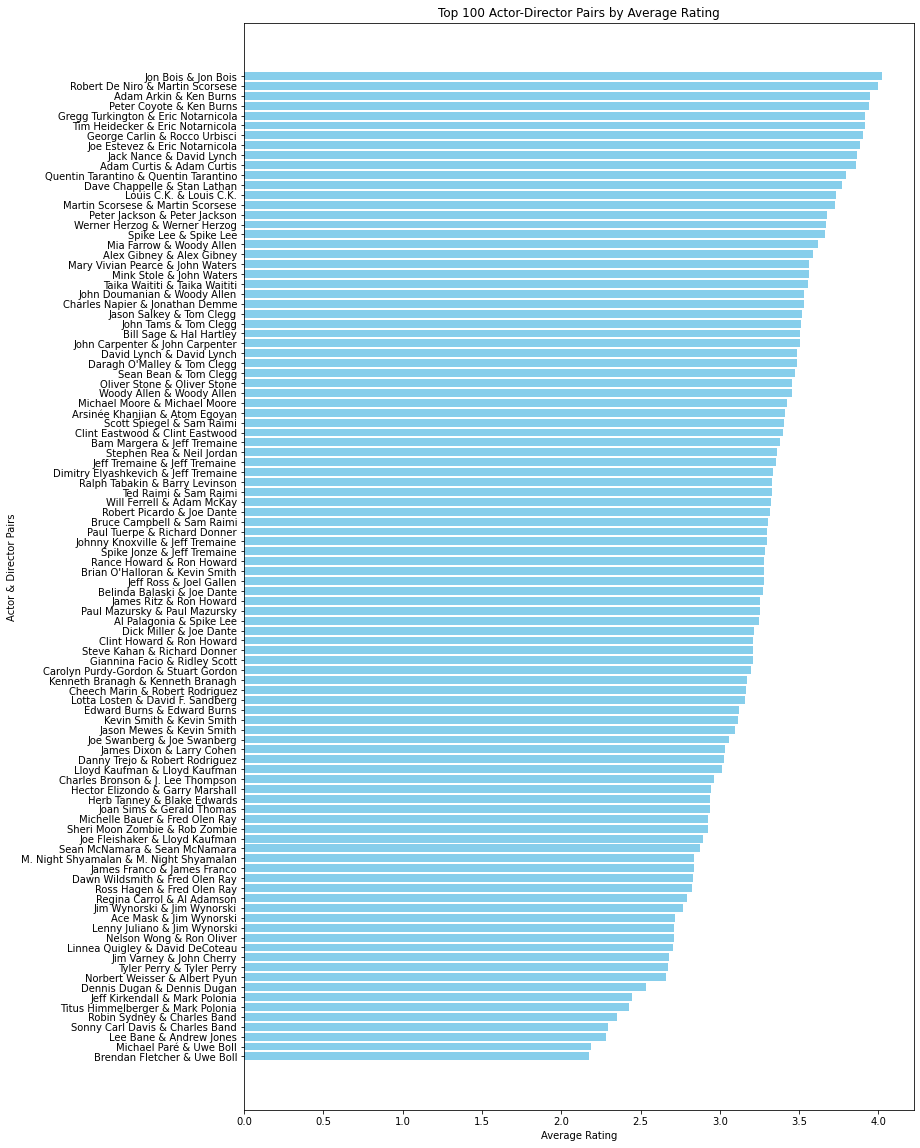

In [11]:
# Visualizing of rating of top 100 actor-director pairs that at least collabrated once
top_100_collaborations = more_than_one_collaboration.nlargest(100, 'collaboration')
top_100_sorted_by_rating = top_100_collaborations.sort_values(by='mean', ascending=False)
plt.figure(figsize=(12, 20))
plt.barh(top_100_sorted_by_rating['actors'] + ' & ' + top_100_sorted_by_rating['director'], 
         top_100_sorted_by_rating['mean'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Actor & Director Pairs')
plt.title('Top 100 Actor-Director Pairs by Average Rating')
plt.gca().invert_yaxis()
plt.yticks(rotation=0)

plt.show()
